In [ ]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [1]:
# Importation des librairies
from webscraping.ws_fonctions import *
from fonctions_1_nettoyage import *
from fonctions_2_graph import *

import seaborn as sns #pas besoin si utilise fonctions
import matplotlib.pyplot as plt

# Regression
import statsmodels.api as sm
from statsmodels.formula.api import rlm 

## Création de la base de données

### Webscrapping AlloCiné

In [2]:
base_films = get_base_films(2010,2012)

nombre de films récupérés :  491
nombre de films récupérés :  518
nombre de films récupérés :  521


### Ajout et création de variables

In [32]:
# Ajout du genre des réalisateurs
table_avec_genre = get_genre_individuel(base_films, 'auteur')

# Aperçu du nb de réalisateurs m vs f
table_avec_genre['genre_ind'].value_counts()


genre_ind
m      954
f      167
m,f     48
f,m     14
Name: count, dtype: int64

In [33]:
table_avec_genre.head()

,genre_ind,titre,identifiant,date,durée,auteur,spectateur,presse,genre1,genre2,genre3
0,m,4h44 Dernier jour sur terre,193915,19 décembre 2012,1h 22min,Abel Ferrara,"2,2","3,3",Drame,Science Fiction,
1,m,Very Bad Cops,144195,27 octobre 2010,1h 47min,Adam McKay,"2,5","3,3",Action,Comédie,
2,m,You're Next,192301,4 septembre 2013,1h 35min,Adam Wingard,"3,0","3,3",Epouvante-horreur,,
3,m,Rock Forever,141538,11 juillet 2012,2h 02min,Adam Shankman,"2,9","2,5",Comédie dramatique,Comédie musicale,
4,m,Gimme the Loot,203507,2 janvier 2013,1h 21min,Adam Leon,"2,9","3,6",Drame,,


In [34]:
# Transformation des types de films en variables dummy 
dummies1 = pd.get_dummies(table_avec_genre['genre1'], prefix='genre')
dummies2 = pd.get_dummies(table_avec_genre['genre2'], prefix='genre')
dummies3 = pd.get_dummies(table_avec_genre['genre3'], prefix='genre')

dummies1 = dummies1.astype(int)
dummies2 = dummies2.astype(int)
dummies3 = dummies3.astype(int)

dummies_sum = dummies1.add(dummies2, fill_value=0).add(dummies3, fill_value=0)
dummies_sum = dummies_sum.drop(columns=['genre_'])

df = pd.concat([table_avec_genre, dummies_sum], axis=1)
print('nombre de films pris en compte :', len(df))

nombre de films pris en compte : 1183


In [35]:
# Conversion des notes en décimale
table_avec_genre['spectateur'] = table_avec_genre['spectateur'].apply(mise_en_forme_decimale)
table_avec_genre['presse'] = table_avec_genre['presse'].apply(mise_en_forme_decimale)

In [36]:
# Création variable : différence de notation entre spectateur et presse
table_avec_genre['diff_notation'] = table_avec_genre['spectateur']-table_avec_genre['presse']
table_avec_genre.head()


,genre_ind,titre,identifiant,date,durée,auteur,spectateur,presse,genre1,genre2,genre3,diff_notation
0,m,4h44 Dernier jour sur terre,193915,19 décembre 2012,1h 22min,Abel Ferrara,2.2,3.3,Drame,Science Fiction,,-1.1
1,m,Very Bad Cops,144195,27 octobre 2010,1h 47min,Adam McKay,2.5,3.3,Action,Comédie,,-0.8
2,m,You're Next,192301,4 septembre 2013,1h 35min,Adam Wingard,3.0,3.3,Epouvante-horreur,,,-0.3
3,m,Rock Forever,141538,11 juillet 2012,2h 02min,Adam Shankman,2.9,2.5,Comédie dramatique,Comédie musicale,,0.4
4,m,Gimme the Loot,203507,2 janvier 2013,1h 21min,Adam Leon,2.9,3.6,Drame,,,-0.7


In [38]:
table_avec_genre = get_annee(table_avec_genre, 'date')

In [40]:
# Conversion de la durée en minutes
table_avec_genre['durée'] = table_avec_genre['durée'].astype('string')
table_avec_genre['duree_min'] = table_avec_genre['durée'].apply(duree_en_minutes)

## Quelques graphes....

Dropdown(description='Genre :', index=2, options=('Drame', 'Comédie', 'Action', 'Comédie dramatique', 'Aventur…

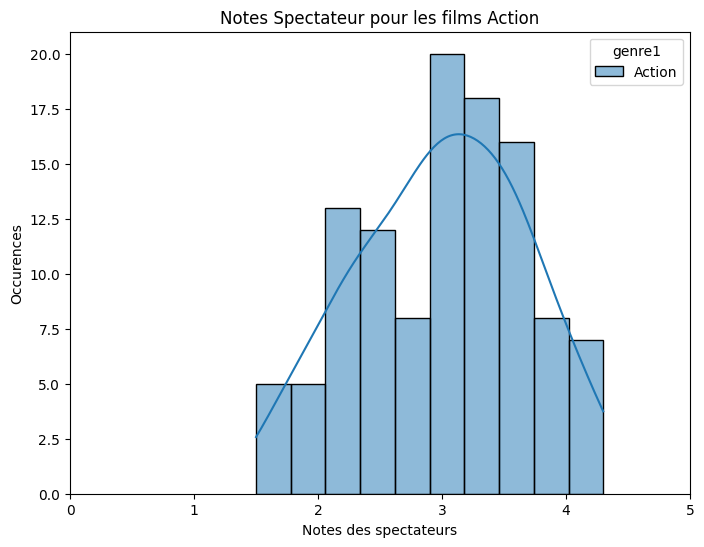

In [ ]:
graphique_genre_film(table_avec_genre)  

Dropdown(description='Genre du film :', options=('Drame', 'Comédie', 'Action', 'Comédie dramatique', 'Aventure…

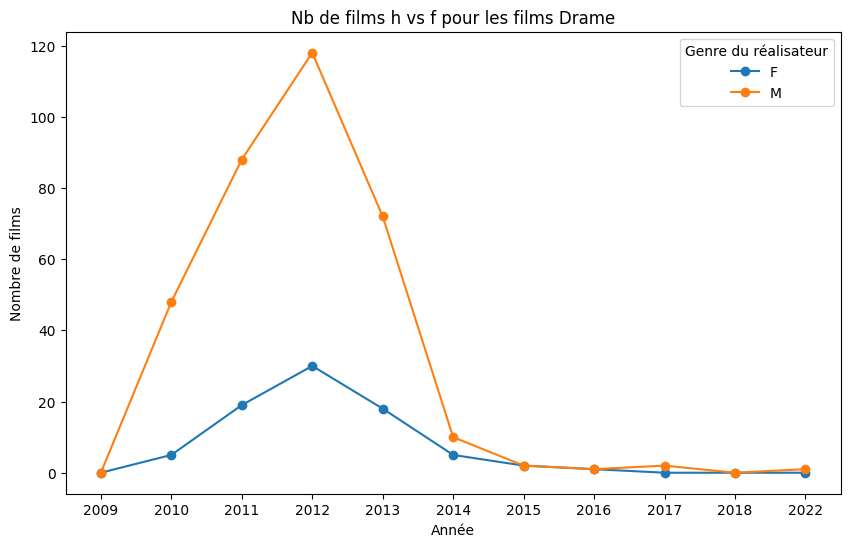

In [142]:
graphique_h_f(table_avec_genre)

## Test de modèles sur la différence de notation

### ANOVA (sur premier genre)

### Regression

- Notes spectateurs

In [122]:
# Définir les variables dépendantes et indépendantes
X = df[['duree_min', 'genre_Action', 'genre_Animation', 'genre_Policier', 'genre_Thriller', 'genre_Science Fiction', 'genre_Drame', 'genre_Aventure']]
y = df['spectateur']
X = sm.add_constant(X)

# Régression linéaire OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             spectateur   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     15.89
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           2.22e-19
Time:                        19:22:41   Log-Likelihood:                -256.63
No. Observations:                 296   AIC:                             531.3
Df Residuals:                     287   BIC:                             564.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.71

- Notes presse

In [124]:
# Définir les variables dépendantes et indépendantes
X = df[['duree_min', 'genre_Action', 'genre_Animation', 'genre_Policier', 'genre_Thriller', 'genre_Science Fiction', 'genre_Drame', 'genre_Aventure']]
y = df['presse']
X = sm.add_constant(X)

# Régression linéaire OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 presse   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     17.38
Date:                Sun, 03 Nov 2024   Prob (F-statistic):           4.49e-21
Time:                        19:23:34   Log-Likelihood:                -216.55
No. Observations:                 296   AIC:                             451.1
Df Residuals:                     287   BIC:                             484.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.29

- Différences de notations

In [125]:
# Définir les variables dépendantes et indépendantes
X = df[['duree_min', 'genre_Action', 'genre_Animation', 'genre_Policier', 'genre_Thriller', 'genre_Science Fiction', 'genre_Drame', 'genre_Aventure']]
y = df['diff_notation']
X = sm.add_constant(X)

# Régression linéaire OLS
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          diff_notation   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1.929
Date:                Sun, 03 Nov 2024   Prob (F-statistic):             0.0556
Time:                        19:25:00   Log-Likelihood:                -226.63
No. Observations:                 296   AIC:                             471.3
Df Residuals:                     287   BIC:                             504.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.57

In [126]:
# test robuste à l'hétéroscédasticité ?
model = rlm("diff_notation ~ duree_min + genre_Action + genre_Animation+genre_Policier+genre_Fantastique+genre_Drame+genre_Aventure", data=df).fit()
print(model.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:          diff_notation   No. Observations:                  296
Model:                            RLM   Df Residuals:                      288
Method:                          IRLS   Df Model:                            7
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 03 Nov 2024                                         
Time:                        19:25:14                                         
No. Iterations:                    16                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5961      0.18